The dataset is taken from Kaggle
https://www.kaggle.com/datasets/ashydv/advertising-dataset/data

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("advertising.xls")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

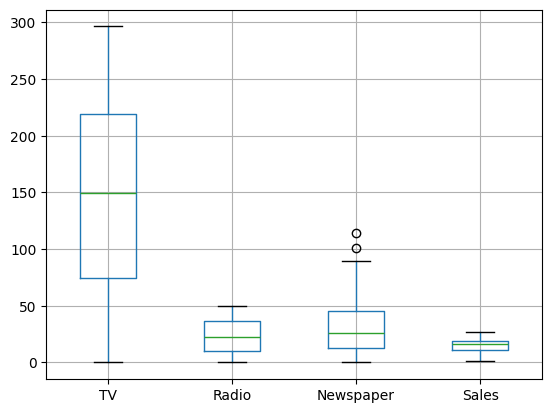

In [16]:
df.boxplot()

The above boxplot is used for finding the outliers present in the feature columns

<Axes: >

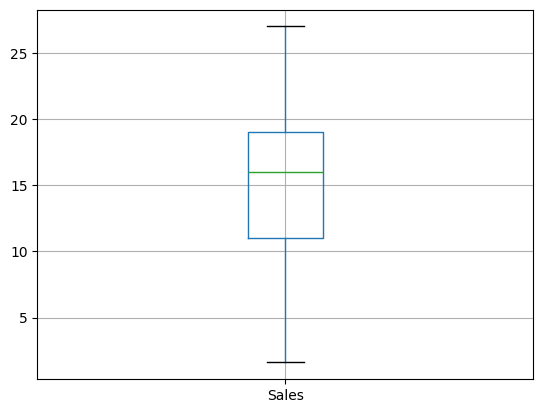

In [29]:
df[['Sales']].boxplot()

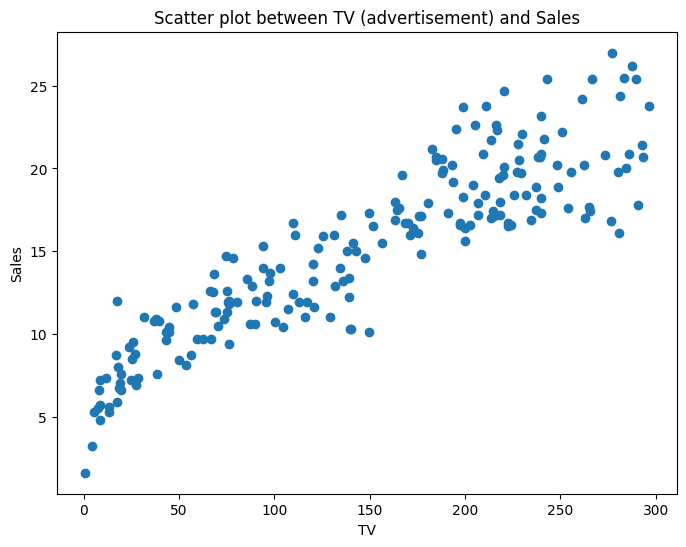

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df['TV'],df['Sales'])
plt.title("Scatter plot between TV (advertisement) and Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

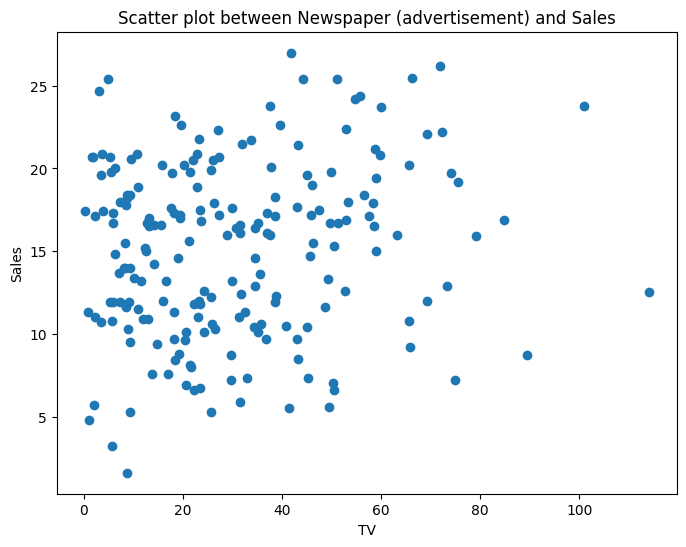

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df['Newspaper'],df['Sales'])
plt.title("Scatter plot between Newspaper (advertisement) and Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

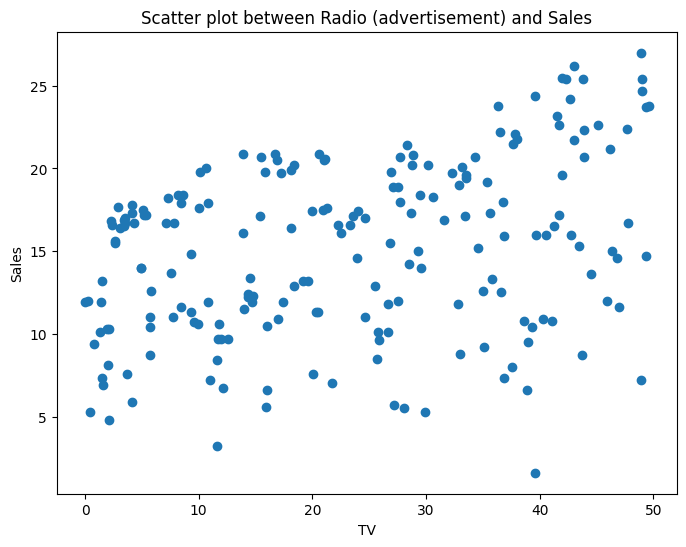

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(df['Radio'],df['Sales'])
plt.title("Scatter plot between Radio (advertisement) and Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [38]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [39]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
X_train, X_test, y_train , y_test =  train_test_split(X,y, test_size= 0.20 ,random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
mse = mean_squared_error(y_test,y_pred)
mse

2.9077569102710896

In [67]:
r2 = r2_score(y_test,y_pred)
r2

0.9059011844150826

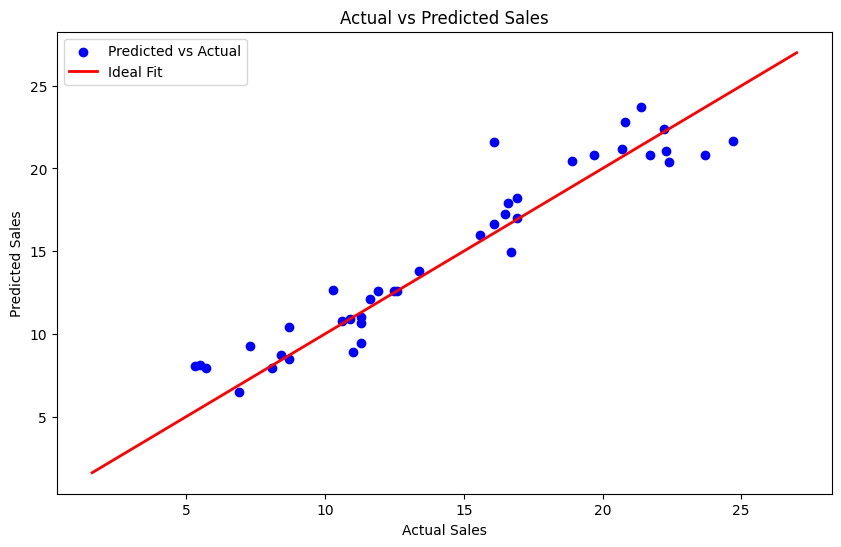

In [69]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()